In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")

In [51]:
theYear = 2018
#PGE SCE SDGE
region="SDGE"
year = pd.DataFrame()
for i in range(12):
    theMonth = i+1
    if(theMonth < 10):
        theMonth = "0"+str(theMonth)
    else:
        theMonth = str(theMonth)
    month = pd.read_csv("marginal_emission/SGIP_CAISO_{}/SGIP_CAISO_{}_{}-{}_ALL_MOER_VERSIONS.csv".format(region,region,theYear,theMonth),parse_dates=['timestamp'])
    year = pd.concat([year, month], axis=0)

In [52]:
print(month.dtypes)

timestamp           datetime64[ns, UTC]
MOER version 2.0                float64
MOER version 1.0                float64
dtype: object


<AxesSubplot:xlabel='timestamp'>

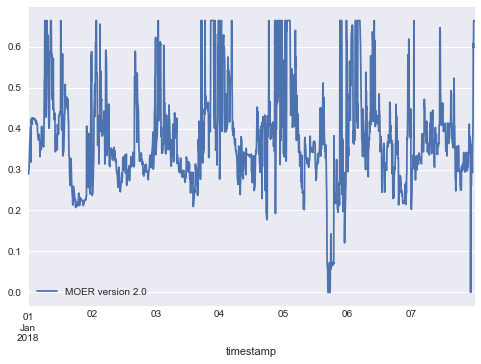

In [53]:
q1 = year[0:288*7]
q1.plot(x="timestamp", y="MOER version 2.0")

In [54]:
def isLeapYr(theYear):
    if ((theYear % 4 == 0) and (theYear % 100 != 0)) or (theYear % 400 == 0):
        return 366
    else:
        return 365

In [55]:
# Create Heatmap
if isLeapYr(theYear)==True:
    day = 366
else:
    day = 365
time = 12*24
matrix = np.zeros(day*time,dtype=float)

MOERV2 = 1

plt.figure(figsize=(time,day))

for i in range (day):
    for j in range (time):
        MOER = year.iloc[int(i*time+j),MOERV2]
        #print(i*time+j)
        #print(MOER)
#         #print(year[i*time+j:i*time+j+1]['MOER version 2.0'].astype(float))
#         #MOER = year[i*time+j:i*time+j+1]['MOER version 2.0'].astype(float)
#         MOER = year[i*time+j:i*time+j+1]['MOER version 2.0']
#         MOER = str(MOER)[5:13]
#         print(MOER)
#         if(MOER=='0.0'):
#             MOER = 0
#         MOER = float(MOER)
        matrix[i*time+j] = MOER

<Figure size 20736x26280 with 0 Axes>

In [56]:
matrix = matrix.reshape(day,time)
# print(matrix)

In [57]:
theIndex = np.zeros(time,dtype=object)
for i in range(time):
    minute = (i*5)%60
    if minute < 10:
        minute = "0"+str(minute)
    hour = int(i/12)
    if hour < 10:
        hour = "0"+str(hour)
    
    hour = str(hour)
    minute = str(minute)
    timeStr = hour+":"+minute
    theIndex[i] = timeStr
    
theColumn = np.zeros(day,dtype=object)
if isLeapYr(theYear)==True:
    month_arr = [31,29,31,30,31,30,31,31,30,31,30,31]
else:
    month_arr = [31,28,31,30,31,30,31,31,30,31,30,31]

month_idx = 1
day_elapse = 1
for i in range(day):
    if day_elapse > month_arr[month_idx-1]:
        month_idx += 1
        day_elapse = 1
        
    if month_idx < 10:
        month = "0"+(str(month_idx))
    else:
        month = str(month_idx)
    
    if day_elapse < 10:
        day_idx = "0"+(str(day_elapse))
    else:
        day_idx = str(day_elapse)
        
    theColumn[i] = (str(theYear)) +"-"+ month +"-"+ day_idx
    day_elapse += 1

theColumn = theColumn.tolist()
theIndex = theIndex.tolist()
# print(theIndex)
# print(theColumn)

In [58]:
matrix = pd.DataFrame(matrix, columns=theIndex,index=theColumn)
matrix.T
matrix.to_csv('./processed_data/{}_{}_MOER.csv'.format(region,theYear),index=True)

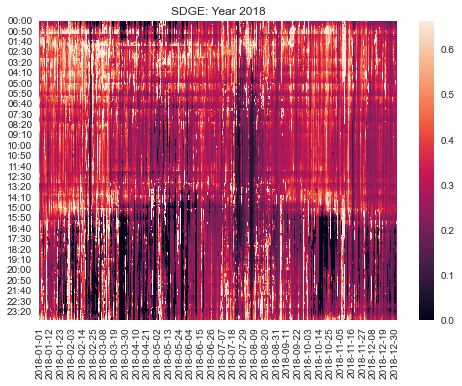

In [59]:
# month.plot(x="timestamp", y=["MOER version 2.0", "MOER version 1.0"])
yearplt = plt.axes()
heat_map = sns.heatmap(matrix.T)
yearplt.set_title('{}: Year {}'.format(region,theYear))
plt.savefig("./plots/{}/MOER_heatmap_{}_{}.png".format(region,region,theYear))
plt.show()

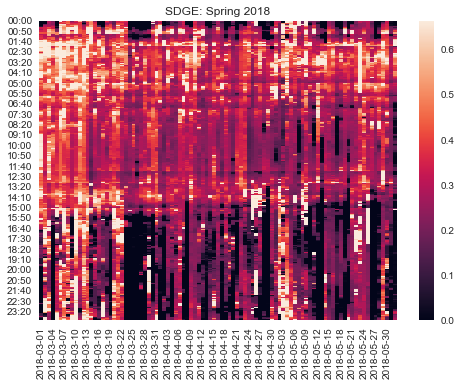

In [60]:
# Analyze Different Season
# spring = df2[59:152].mean().iloc[1:]
# summer = df2[152:243].mean().iloc[1:]
# autumn = df2[243:334].mean().iloc[1:]
# winter = pd.concat([df2[334:365],df2[0:59]]).mean().iloc[1:]

spring = matrix.loc[:][59:152].T
summer = matrix.loc[:][152:243].T
autumn = matrix.loc[:][243:334].T
winter = pd.concat([matrix[334:365],matrix[0:59]]).T

springPlt = plt.axes()
heat_map_spring = sns.heatmap(spring)
springPlt.set_title('{}: Spring {}'.format(region,theYear))
plt.savefig("./plots/{}/MOER_heatmap_{}_{}_spring.png".format(region,region,theYear))
plt.show()


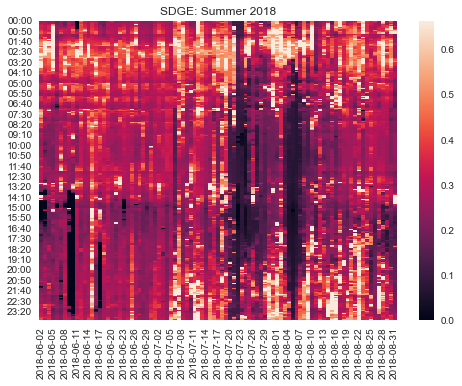

In [61]:
summerPlt = plt.axes()
summerPlt.set_title('{}: Summer {}'.format(region,theYear))
heat_map_summer = sns.heatmap(summer)
plt.savefig("./plots/{}/MOER_heatmap_{}_{}_summer.png".format(region,region,theYear))
plt.show()

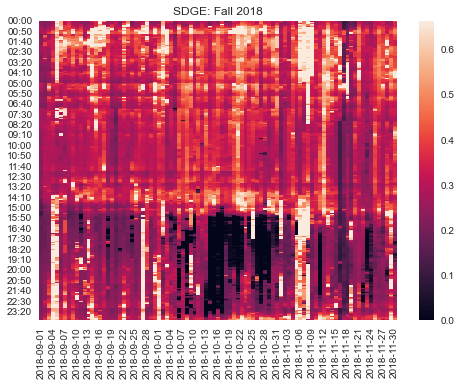

In [62]:
fallPlt = plt.axes()
heat_map_autumn = sns.heatmap(autumn)
fallPlt.set_title('{}: Fall {}'.format(region,theYear))
plt.savefig("./plots/{}/MOER_heatmap_{}_{}_fall.png".format(region,region,theYear))
plt.show()

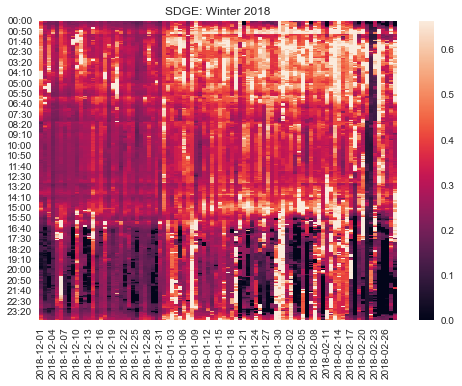

In [63]:
winterPlt = plt.axes()
heat_map_winter = sns.heatmap(winter)
winterPlt.set_title('{}: Winter {}'.format(region,theYear))
plt.savefig("./plots/{}/MOER_heatmap_{}_{}_winter.png".format(region,region,theYear))
plt.show()